# KNN

https://nlp.stanford.edu/IR-book/newslides.html

확률 모델을 이용할 것 이다. 

확률로 Text Classification을 할 것.

분류를 추천에도 이용할 수 있다. 

No-Free-lunch : 데이터에 라벨을 스스로 붙여야한다. 

그 전에 확률에 대해 짚고 넘어가자.


## MLE ( Maximum Likelihood Estimation )

빈도 추정과 / bayes를 이용한 방법이 있다. 

이항 분포를 따름 

log를 취하는 이유는 극한으로 보내는 것이 거의 관례인데, x&y가 정비례하게 증가하기에 사용한다. 

* PAC learning : Probably approximate correction 

에러의 범위를 줄이기 위해 시행 횟수를 늘리려고 하는 것이다. e, 와 N에 관계가 있다. 

## MAP ( Maximum A Posteriori Estimation ) 


------

위 두 개를 이용해서 최적의 세타를 추정하는 것이다


* Chain rule

$P(A,B,C,\cdots,Z)$ 이 것도 결합확률로 봐서 (A 1개와 나머지는 조건으로 보기) 베이지안을 이용해서 $P(Z)$ 가 나올 때까지 쭉 전개한다. 


https://cs.stanford.edu/people/abisee/nn.pdf

http://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/05_nn.pdf  : 수식 설명 포함

 




In [150]:
# 2차원 공간 상에 랜덤 변수 뿌리기 ( 1- 100)
from random import randint

# generating
# D =>0 : (1,1) / 1: (2,2)
# C => 0:0  1:1
data = list()
category = list()

N = 20

for i in range(N):
    data.append((randint(1,100), randint(1,100)))
    category.append(1 if sum(data[i]) > 100 else 0)
    # 100 이상 1, 아니면 0

In [151]:
category

[0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]

# Euclidean Distance

In [177]:
from math import sqrt
def euclidean(x,y):
    return sqrt((x[0] - y[0])**2 + (x[1]-y[1])**2)
    

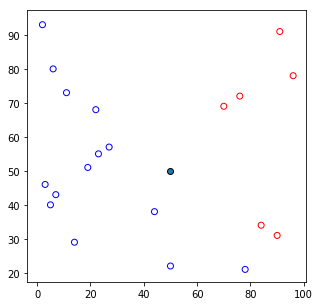

In [178]:
import matplotlib.pyplot as plt

x = [row[0] for row in data]
y = [row[1] for row in data]

similarity = list()

sample = (50,50)

plt.rcParams["figure.figsize"] = (5,5)  # 정사각형
colorMap = ["b","r"]

for i in range(N):
    similarity.append((i,euclidean(data[i],sample)))
    plt.scatter(x[i],y[i],facecolor="none",edgecolors=colorMap[category[i]])

plt.scatter(sample[0], sample[1], edgecolors='k' )
plt.show()

In [179]:
K = 3
candidateList = list()
for i, (idx,dist) in enumerate(sorted(similarity, key = lambda x:x[1])):
    if (i+1) > K:       # 가까운 K개만 뽑아냄 
        break
    candidateList.append(idx)

In [181]:
list(enumerate(sorted(similarity, key = lambda x:x[1])))

[(0, (15, 13.416407864998739)),
 (1, (2, 24.041630560342615)),
 (2, (4, 27.459060435491963)),
 (3, (13, 27.586228448267445)),
 (4, (14, 28.0)),
 (5, (17, 31.016124838541646)),
 (6, (12, 33.28663395418648)),
 (7, (6, 34.058772731852805)),
 (8, (11, 37.57658845611187)),
 (9, (0, 40.311288741492746)),
 (10, (8, 41.677331968349414)),
 (11, (16, 43.56604182158393)),
 (12, (9, 44.28317965096906)),
 (13, (10, 45.27692569068709)),
 (14, (18, 46.09772228646444)),
 (15, (3, 47.16990566028302)),
 (16, (19, 53.25410782277739)),
 (17, (1, 53.85164807134504)),
 (18, (7, 57.982756057296896)),
 (19, (5, 64.4437739428721))]

In [155]:
# 가장 가까운 점들 
candidateList

[15, 2, 4]

In [156]:
candidateCategory = list([0] * len(set(category)))

for idx in candidateList:
    candidateCategory[category[idx]] += 1

In [157]:
# 0 : 2개 , 1 : 1개
candidateCategory

[3, 0]

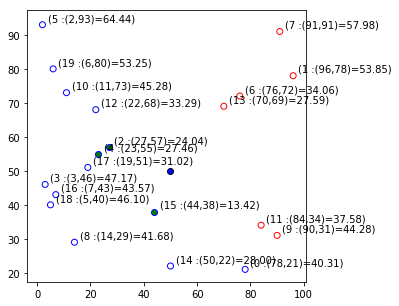

In [159]:
# candidateCategory.index(max(candidateCategory))
colorMap = ["b","r"]

for i in range(N):
    if i in candidateList:
         plt.scatter(x[i],y[i],facecolor="g",edgecolors=colorMap[category[i]])
    else:
        plt.scatter(x[i],y[i],facecolor="none",edgecolors=colorMap[category[i]])
    plt.text(x[i]+2,y[i]+1, "({0} :({1},{2})={3:.2f})".format(i,x[i],y[i],similarity[i][1]))
    
plt.scatter(sample[0], sample[1], facecolors=colorMap[candidateCategory.index(max(candidateCategory))],edgecolors='k' )
plt.show()

# Cosine ( angle )

In [182]:
# cosine similarity

def cosine(x,y):
    innerProduct = 0
    xLength = 0.0
    yLength = 0.0
    
    for i in range(len(x)):
        innerProduct += x[i] * y[i]
        
    xLength = euclidean(x,(0,0))
    yLength = euclidean(y,(0,0))    
    return innerProduct/(xLength*yLength)

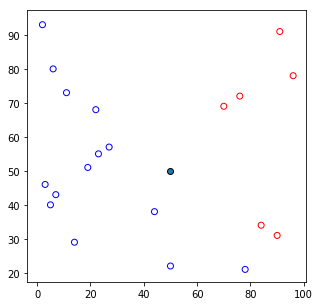

In [183]:
import matplotlib.pyplot as plt

x = [row[0] for row in data]
y = [row[1] for row in data]

similarity = list()

sample = (50,50)

plt.rcParams["figure.figsize"] = (5,5)  # 정사각형
colorMap = ["b","r"]

for i in range(N):
    similarity.append((i,cosine(data[i],sample)))
    plt.scatter(x[i],y[i],facecolor="none",edgecolors=colorMap[category[i]])

plt.scatter(sample[0], sample[1], edgecolors='k' )
plt.show()

In [174]:
# distance와는 다르게 cosine은 값이 높은게 좋은 것 
K = 3
candidateList = list()
for i, (idx,dist) in enumerate(sorted(similarity, key = lambda x:x[1],reverse=True)):
    if (i+1) > K:       # 가까운 K개만 뽑아냄 
        break
    candidateList.append(idx)

In [175]:
candidateCategory = list([0] * len(set(category)))

for idx in candidateList:
    candidateCategory[category[idx]] += 1

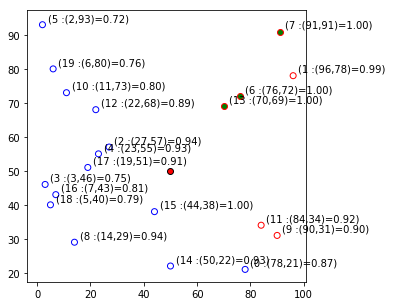

In [176]:
# Linear 한 선 쪽으로 점이 색칠되게 된다.
# cosine = 1 이 제일 좋은 것. 
colorMap = ["b","r"]

for i in range(N):
    if i in candidateList:
         plt.scatter(x[i],y[i],facecolor="g",edgecolors=colorMap[category[i]])
    else:
        plt.scatter(x[i],y[i],facecolor="none",edgecolors=colorMap[category[i]])
    plt.text(x[i]+2,y[i]+1, "({0} :({1},{2})={3:.2f})".format(i,x[i],y[i],similarity[i][1]))
    
plt.scatter(sample[0], sample[1], facecolors=colorMap[candidateCategory.index(max(candidateCategory))],edgecolors='k' )
plt.show()